## Part 1.6 - Dropout
#### *Pol Roca Llaberia*

In this notebook we will analyze the effects of adding a dropout layer in the architecture. The dropout strategy is a regularization technique that aims to improve the generalization by making the result less dependent on specific neurons. Let's see if that can also improve the problem of data scarcity.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np 

In [ ]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
N = 300

In [ ]:
X_train = X_train[:N]
y_train = y_train[:N]
X_test = X_test[:2500]
y_test = y_test[:2500]

# Make sure images have shape (28, 28, 1)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [ ]:
print(X_train.shape)
print(X_test.shape)
np.unique(y_test, return_counts=True)

(300, 28, 28, 1)
(2500, 28, 28, 1)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([219, 287, 276, 254, 275, 221, 225, 257, 242, 244]))

In [ ]:
def build_model_baseline():
    model = models.Sequential(name='baseline')
    model.add(layers.Conv2D(20, (5, 5), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(num_classes))
    return model

def build_model_dropout():
    model = models.Sequential(name='dropout')
    model.add(layers.Conv2D(20, (5, 5), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(num_classes))
    return model

In [ ]:
model_baseline = build_model_baseline()
model_dropout = build_model_dropout()

print(model_baseline.summary(), '\n\n')
print(model_dropout.summary())

Model: "baseline"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 24, 24, 20)        520       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 20)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2880)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                28810     
Total params: 29,330
Trainable params: 29,330
Non-trainable params: 0
_________________________________________________________________
None 


Model: "dropout"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 20)        520       
_____________________________

In [ ]:
 for model in [model_baseline, model_dropout]:
    model.compile(optimizer='SGD',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])


Make both models start with the same weights

In [ ]:
model_baseline.save_weights('initial.h5')
model_dropout.load_weights('initial.h5')

In [ ]:
histories = []
metrics = []
epochs = 50

for model in [model_baseline, model_dropout]:
    history = model.fit(X_train, 
                        y_train, 
                        epochs=epochs, 
                        batch_size=32, 
                        validation_data=(X_test, y_test), 
                        verbose=1)
    histories.append(history.history)
    metrics.append(model.evaluate(X_test,  y_test))

Epoch 1/50
10/10 [==============================] - 1s 34ms/step - loss: 459.5998 - accuracy: 0.1783 - val_loss: 2.3317 - val_accuracy: 0.2752
Epoch 2/50
10/10 [==============================] - 0s 20ms/step - loss: 1.6846 - accuracy: 0.4568 - val_loss: 1.7216 - val_accuracy: 0.5160
Epoch 3/50
10/10 [==============================] - 0s 20ms/step - loss: 0.8631 - accuracy: 0.7094 - val_loss: 1.5338 - val_accuracy: 0.5532
Epoch 4/50
10/10 [==============================] - 0s 20ms/step - loss: 0.4853 - accuracy: 0.8715 - val_loss: 1.8426 - val_accuracy: 0.5724
Epoch 5/50
10/10 [==============================] - 0s 20ms/step - loss: 0.3591 - accuracy: 0.8895 - val_loss: 2.0373 - val_accuracy: 0.5784
Epoch 6/50
10/10 [==============================] - 0s 20ms/step - loss: 0.3381 - accuracy: 0.8769 - val_loss: 1.9561 - val_accuracy: 0.6200
Epoch 7/50
10/10 [==============================] - 0s 20ms/step - loss: 0.1140 - accuracy: 0.9816 - val_loss: 2.0546 - val_accuracy: 0.6444
Epoch 8/50


In [ ]:
for loss, acc in np.round(metrics, 2):
    print(f'loss: {loss:.2f} accuracy: {acc:.2f}')

loss: 3.13 accuracy: 0.65
loss: 2.59 accuracy: 0.67


In [ ]:
def plot_curves(history, axes, title=''):
    # plot accuracy
    acc = history['accuracy']
    val_acc = history['val_accuracy']
    epochs = range(1, len(acc)+1)

    ax = axes[0]
    ax.plot(epochs, acc, 'b', label='Training Acc')
    ax.plot(epochs, val_acc, 'r', label='Validation Acc')
    ax.set_title('Accuracy curves | ' + title)
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Accuracy')
    ax.grid(alpha=0.4)
    ax.legend()

    # plot validation loss
    loss = history['loss']
    val_loss = history['val_loss']

    ax = axes[1]
    ax.plot(epochs, loss, 'b', label='Training loss')
    ax.plot(epochs, val_loss, 'r', label='Validation loss')
    ax.set_title('Loss curves | ' + title)
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    ax.grid(alpha=0.4)
    ax.legend()

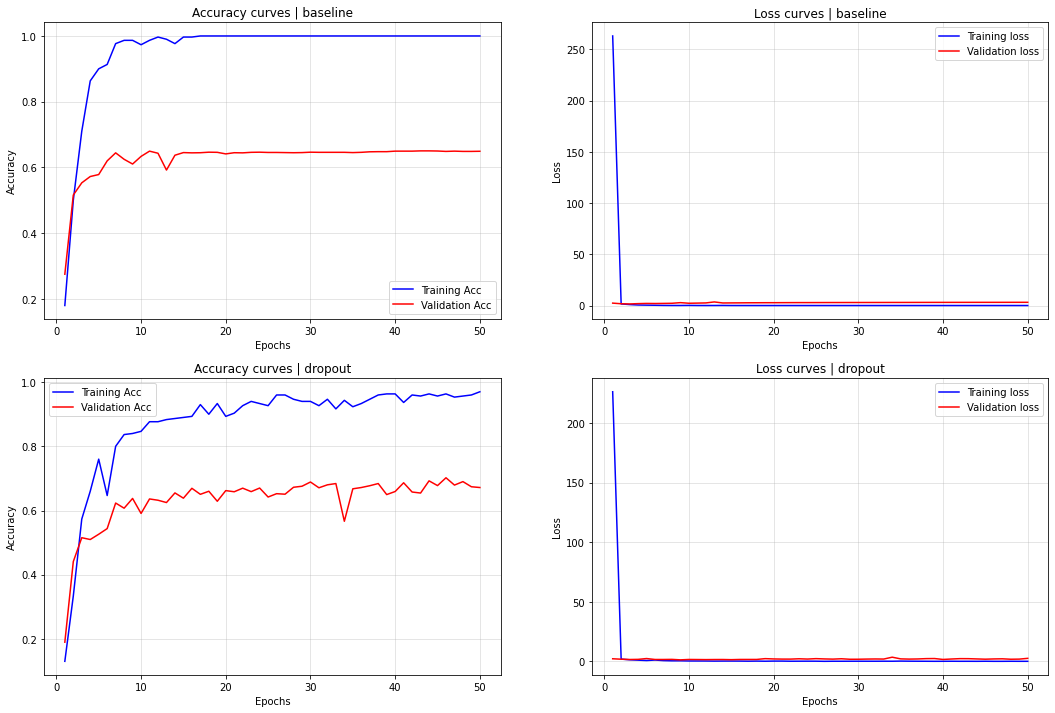

In [ ]:
fig, axes = plt.subplots(len(histories), 2, figsize=(18, 6*len(histories)))

plot_curves(histories[0], axes[0], 'baseline')
plot_curves(histories[1], axes[1], 'dropout')

plt.show()

### Observations

The plots show little differences in results versus the baseline model. We can see that, indeed, the accuracy has improved just a little bit, and the curve is less straight and saturated, which accounts for the increased stochasticity added by the dropout layer. However, I would not say that improvement is significant enough and it could be even caused by a different initialization of the model. 

From my perspective, I think dropout is a technique that helps reducing the variance of a model, preventing thus some overfitting, for example. Here, though, neither the model is complex enough to be suffering from high variance nor there is enough data to make the model learn better patterns by adding constraints in form of missing weights.

---